In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [2]:
df = pd.read_csv('data/student_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['total_score'] =  df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [4]:
X = df.drop(columns=['total_score', 'average_score'], axis = 1)
y = df['total_score']

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
y.head()

0    218
1    247
2    278
3    148
4    229
Name: total_score, dtype: int64

## Column Transformation

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [8]:
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include="object").columns

In [9]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [10]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer,  num_features)
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [13]:
# Train Test SPlit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [15]:
# An evaluation function to give all metric of the models after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    
    return mae, rmse, r2

In [18]:
# Multiple Model Training

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbor Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
    
}

model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set: ")
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("-------------------------------------")
    
    print("Model Performance for Test Set")
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    print('='*35)
    print("\n")
    

Linear Regression
Model Performance for Training Set: 
- Mean Absolute Error: 0.0000
- Root Mean Squared Error: 0.0000
- R2 Score: 1.0000
-------------------------------------
Model Performance for Test Set
- Mean Absolute Error: 0.0000
- Root Mean Squared Error: 0.0000
- R2 Score: 1.0000


Lasso
Model Performance for Training Set: 
- Mean Absolute Error: 0.8505
- Root Mean Squared Error: 1.0644
- R2 Score: 0.9994
-------------------------------------
Model Performance for Test Set
- Mean Absolute Error: 0.8764
- Root Mean Squared Error: 1.1139
- R2 Score: 0.9994


Ridge
Model Performance for Training Set: 
- Mean Absolute Error: 0.0195
- Root Mean Squared Error: 0.0241
- R2 Score: 1.0000
-------------------------------------
Model Performance for Test Set
- Mean Absolute Error: 0.0201
- Root Mean Squared Error: 0.0264
- R2 Score: 1.0000


K-Neighbor Regressor
Model Performance for Training Set: 
- Mean Absolute Error: 5.3040
- Root Mean Squared Error: 6.7719
- R2 Score: 0.9745
-------

## Results

In [20]:
metric_result = pd.DataFrame(list(zip(model_list, r2_list)), columns= ['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
metric_result

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999357
6,XGB Regressor,0.994759
7,Cat Boost Regressor,0.993457
5,Random Forest Regressor,0.993419
4,Decision Tree Regressor,0.988149
8,AdaBoostRegressor,0.979167
3,K-Neighbor Regressor,0.956016


## Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
r2_score = r2_score(y_test, y_pred)*100
print(("Accuracy of the model is %.2f" % r2_score))

Accuracy of the model is 100.00


<Axes: xlabel='total_score', ylabel='Predicted'>

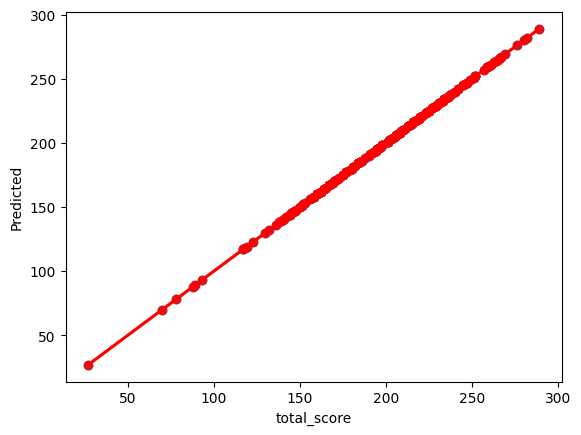

In [22]:
# Plot y_pred & y_test
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

In [26]:
# Difference Btw Actual & Predicted

pred_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})

pred_diff.head(10)

,Actual Value,Predicted Value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,0.000000e+00
740,225,225.0,0.000000e+00
660,224,224.0,0.000000e+00
411,245,245.0,-5.684342e-14
678,234,234.0,0.000000e+00
626,202,202.0,0.000000e+00
513,177,177.0,2.842171e-14
859,232,232.0,0.000000e+00
136,146,146.0,5.684342e-14
